In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
data=pd.read_csv('Salary_Data.csv')

In [255]:
data.shape

(30, 2)

In [256]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [257]:
data[data.duplicated()]#No duplicated values

,YearsExperience,Salary


In [258]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [259]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

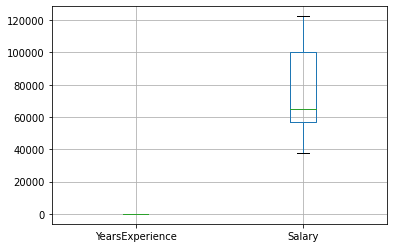

In [260]:
data.boxplot()

In [261]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [262]:
data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

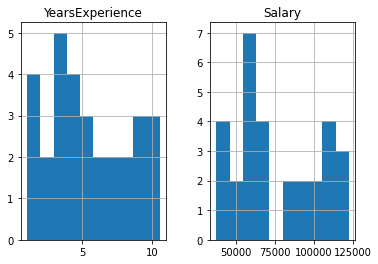

In [263]:
data.hist()

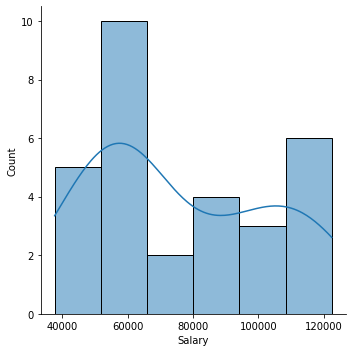

In [264]:
sns.displot(data.Salary,kde=True)

In [265]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

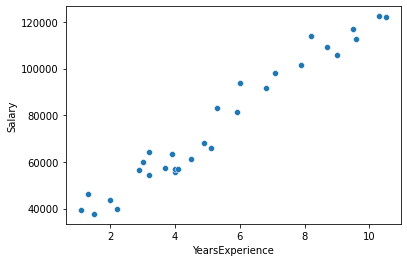

In [266]:
sns.scatterplot(y=data.Salary,x=data.YearsExperience)#Linear correlation

In [267]:
from sklearn.model_selection import train_test_split

In [268]:
X=data.YearsExperience.values.reshape(-1,1)
y=data.Salary.values.reshape(-1,1)

In [269]:
y.shape

(30, 1)

In [270]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [271]:
from sklearn.linear_model import LinearRegression

In [272]:
model=LinearRegression()


In [273]:
model.fit(X_train,y_train)

LinearRegression()

In [274]:
y_pred=model.predict(X_test)

In [275]:
y_test

array([[112635.],
       [ 67938.],
       [113812.]])

Text(0, 0.5, 'Salary')

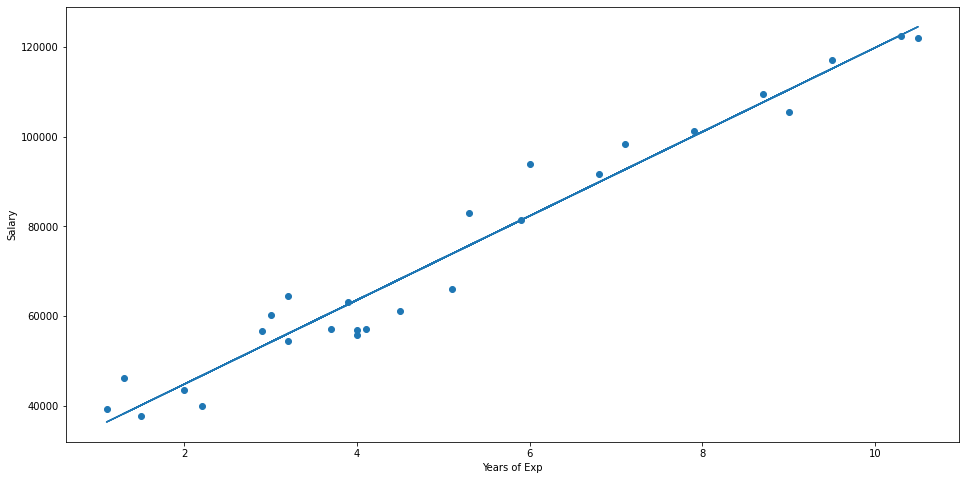

In [276]:
plt.figure(figsize=(16,8))
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))
plt.xlabel("Years of Exp")
plt.ylabel("Salary")



In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
MSE=mean_squared_error(y_test,y_pred)

In [27]:
RMSE=np.sqrt(MSE)

In [28]:
MAE=mean_absolute_error(y_test,y_pred)

In [29]:
r2score=r2_score(y_test,y_pred)

In [30]:
MSE,RMSE,MAE,r2score

(48843452.14621687, 6988.8090649421, 6125.4303471170815, 0.8928775350863083)

In [ ]:
#1st model

In [341]:
lr2=LinearRegression()

In [342]:
score=cross_val_score(estimator=lr2,X=X_train,y=y_train,cv=3)#score after 3 cross validation splits

In [340]:
s.mean()

0.9530081745638018

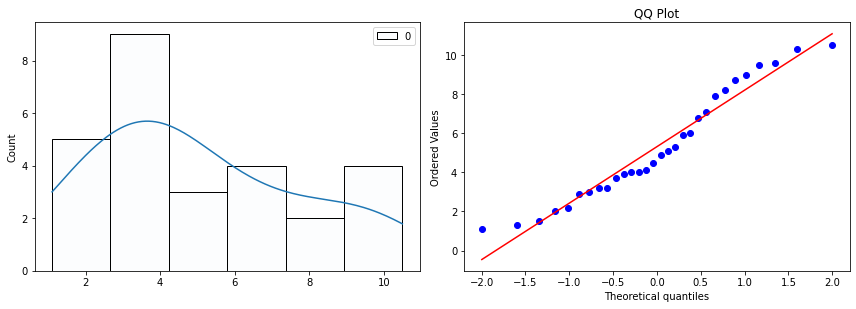

In [425]:
from scipy import stats
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(X_train,alpha=0.01,kde=True)

plt.subplot(2,2,2)
stats.probplot(X.flatten(), dist="norm", plot=plt)
plt.title("QQ Plot")
plt.tight_layout()
plt.show()
#Though we dont need any transformation in this data as skewness is not much and this can be still said as a normal distribution
#We can try to use Power Transformation to check the accuracy more

In [415]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='box-cox',standardize=True)
X_train_box=pt.fit_transform(X_train)
X_test_box=pt.transform(X_test)
y_test_box=pt.transform(y_test)
y_train_box=pt.fit_transform(y_train)

In [416]:
lr3=LinearRegression()
np.mean(cross_val_score(estimator=lr3,X=X_train_box,y=y_train_box,cv=3))
#As we can see after the transformation our score just decreased

0.9264327841017836

In [417]:
#lets see what happened to the transformation

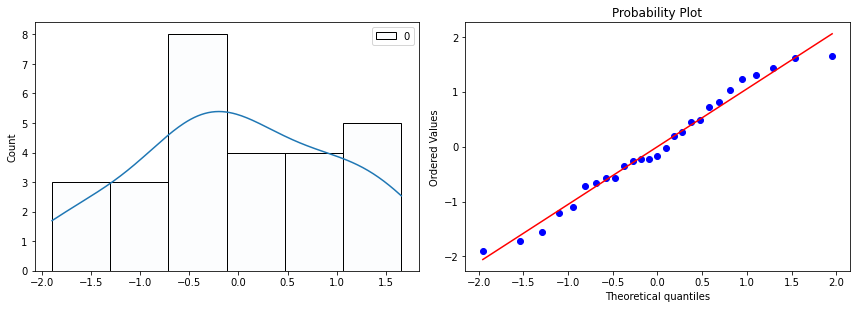

In [424]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.histplot(X_train_box,alpha=0.01,kde=True)
plt.subplot(2,2,2)
stats.probplot(X_train_box.flatten(),plot=plt)
plt.tight_layout();

In [426]:
#Now lets perform Another type of transformation and see the results
pt2=PowerTransformer(method='yeo-johnson')
X_train_yj=pt2.fit_transform(X_train)
y_train_yj=pt2.fit_transform(y_train)
y_test_yj=pt2.transform(y_test)
X_test_yj=pt2.transform(X_test)

In [427]:
lr4=LinearRegression()
np.mean(cross_val_score(estimator=lr4,X=X_train_yj,y=y_train_yj,cv=3))
#a point difference between both yj and box cox but not that much


0.9285972119487883

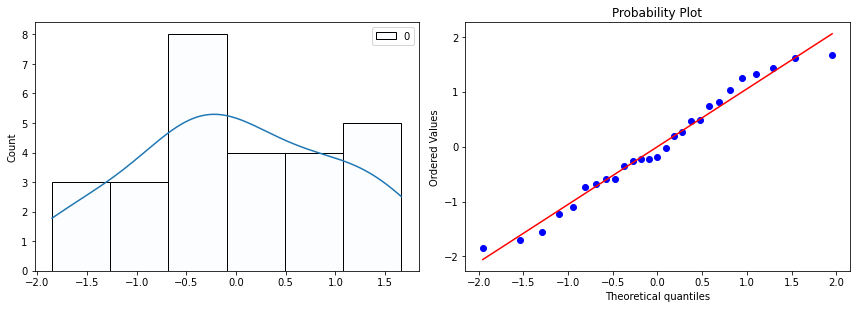

In [430]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(X_train_yj,kde=True,alpha=0.01)
plt.subplot(2,2,2)
stats.probplot(X_train_yj.flatten(),plot=plt)
plt.tight_layout();
#a bit lifted around corners and fat top  probably a case of low kurtosis?lets check

In [433]:
stats.kurtosis(X_train_yj)

array([-0.91178223])

## The Actual Difference Between Box-Cox and Yeo-johnson is that the box cox can handle values in the data which are greater than 0 whereas YJ can handle values for even 0 and -ve values